Problem: https://www.kaggle.com/c/rossmann-store-sales/overview<br>
References: https://colab.research.google.com/drive/1yTF8Yzzn3jtSFVm8NQJQ8qkTGG98G25a#scrollTo=pCw6Tq60DCRI<br>
https://www.kaggle.com/code/elenapetrova/time-series-analysis-and-forecasts-with-prophet

TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE by taking a look at the 2 links above

TASK #2: IMPORT LIBRARIES AND DATASET

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [51]:
sales_train_df = pd.read_csv('../input_data/rossmann_store_sales/train.csv', low_memory=False)

In [52]:
sales_train_df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [53]:
sales_train_df.tail(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017199,1106,2,2013-01-01,0,0,0,0,a,1
1017200,1107,2,2013-01-01,0,0,0,0,a,1
1017201,1108,2,2013-01-01,0,0,0,0,a,1
1017202,1109,2,2013-01-01,0,0,0,0,a,1
1017203,1110,2,2013-01-01,0,0,0,0,a,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [54]:
sales_train_df.info()
# 9 columns in total
# 8 features, each contains 1017209 data points
# 1 target variable (sales)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [55]:
sales_train_df.describe()
# Average sales amount per day = 5773 Euros, minimum sales per day = 0, maximum sales per day = 41551
# Average number of customers = 633, minimum number of customers = 0, maximum number of customers = 7388

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [56]:
store_info_df = pd.read_csv('../input_data/rossmann_store_sales/store.csv', low_memory=False)

In [57]:
store_info_df.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [58]:
# Let's do the same for the store_info_df data
# Note that the previous dataframe includes the transactions recorded per day (in millions)
# This dataframe only includes information about the unique 1115 stores that are part of this study
store_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [59]:
store_info_df.describe()
# on average, the competition distance is 5404 meters away (5.4 kms)

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


<Axes: >

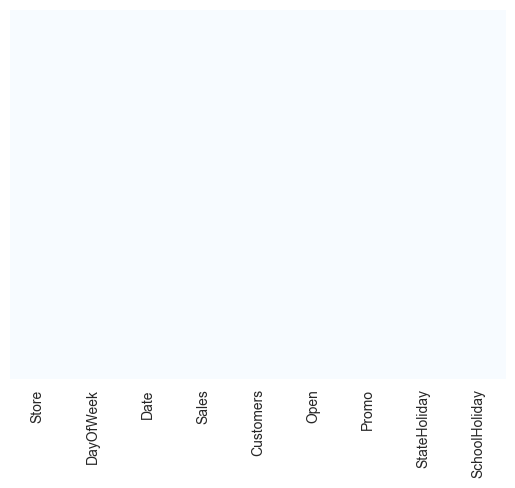

In [60]:
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(sales_train_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'DayOfWeek'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Customers'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Promo'}>],
       [<Axes: title={'center': 'SchoolHoliday'}>, <Axes: >, <Axes: >]],
      dtype=object)

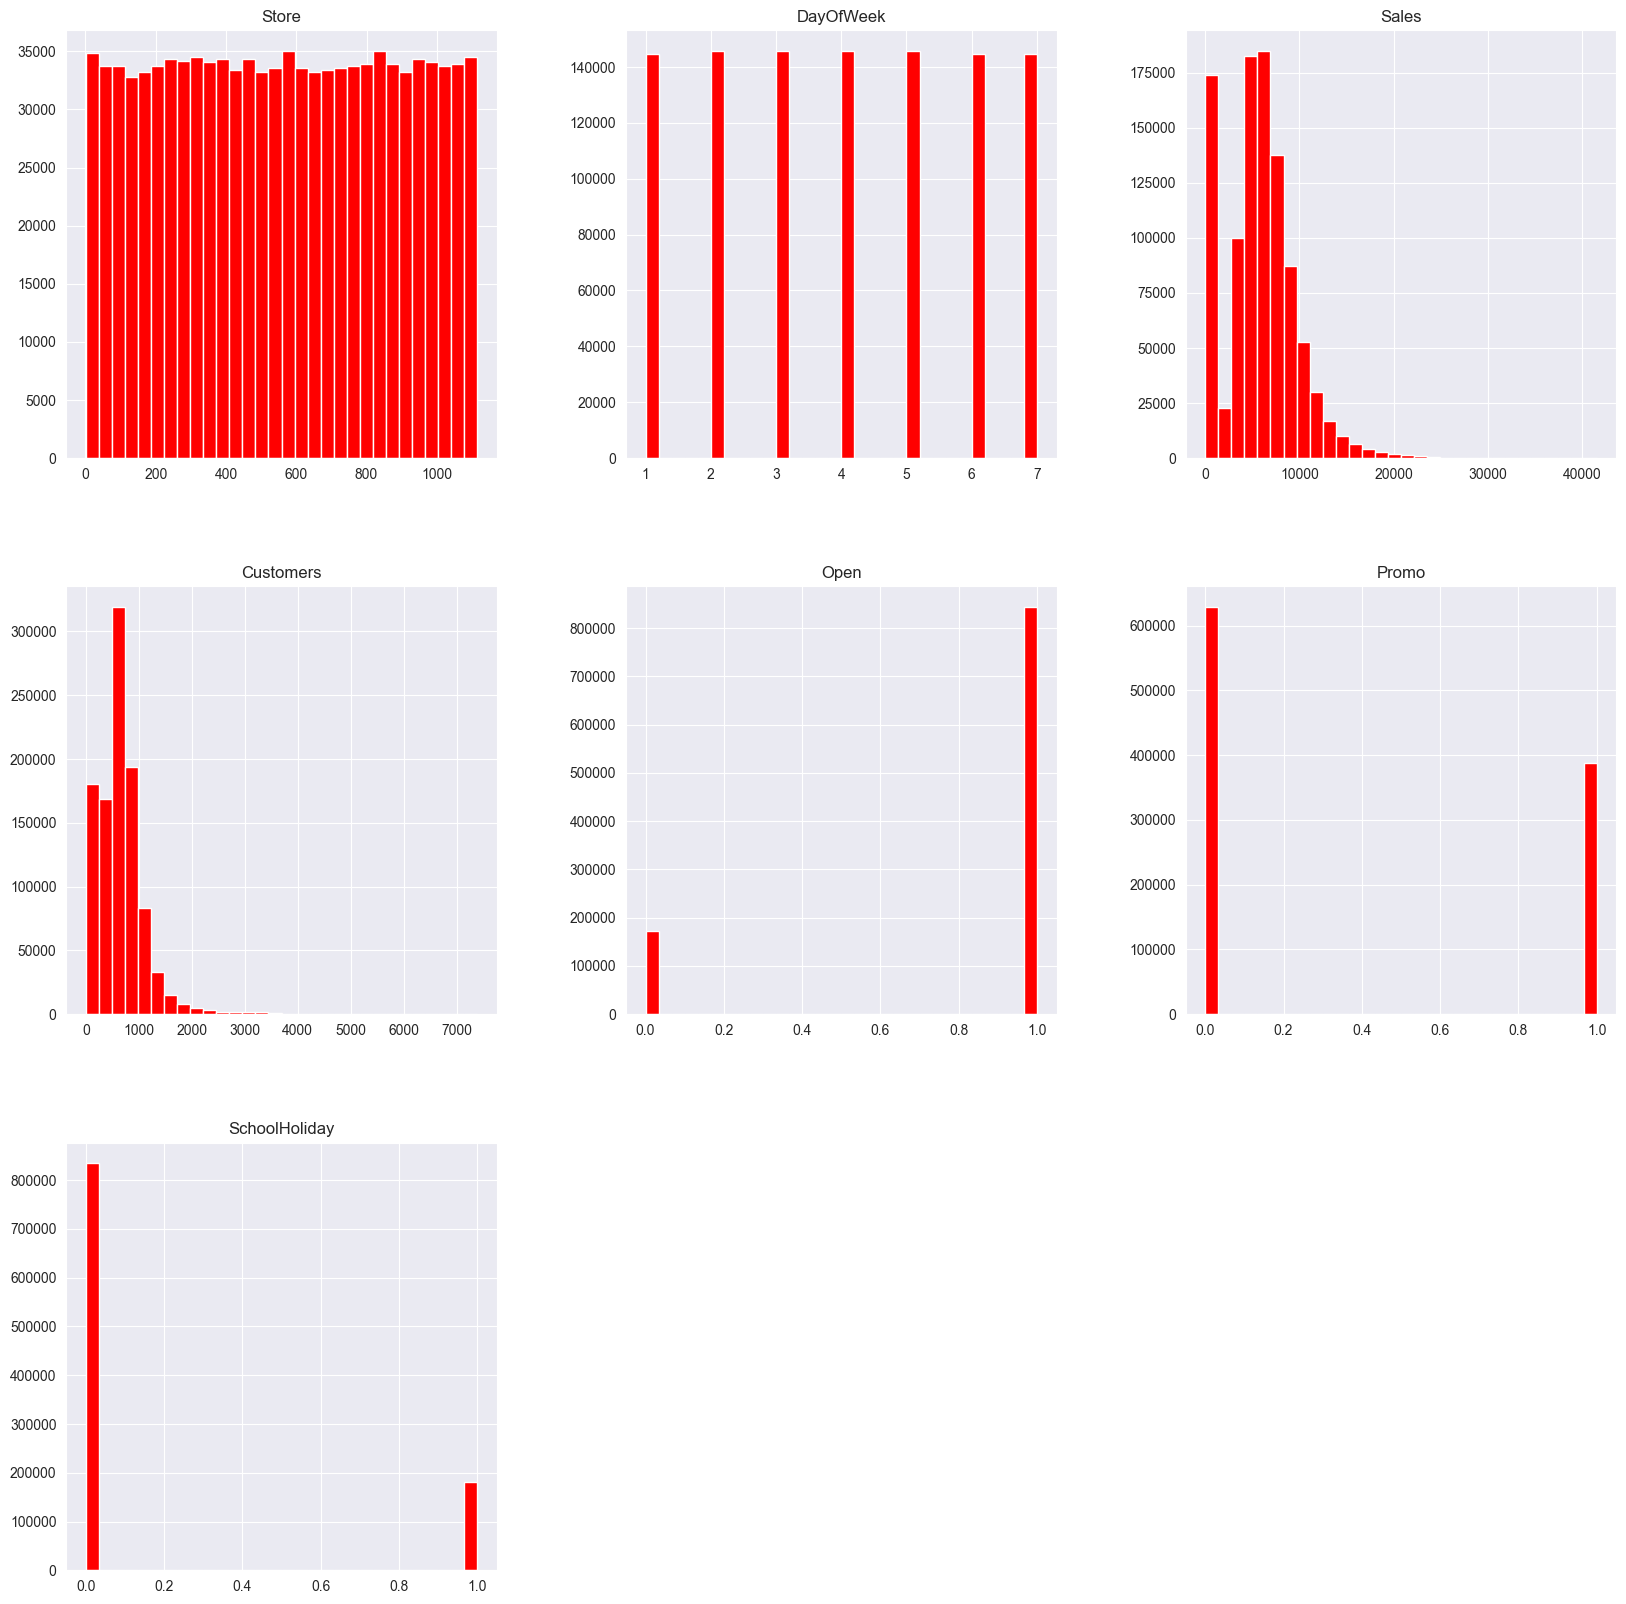

In [61]:
sales_train_df.hist(bins=30, figsize=(20, 20), color='r')
# Store chart: Data is equally distributed among all stores (no bias)
# DayOfWeek chart: Data is equally distributed across various Days of the week (~150000 observations x 7 day = ~1.1 million observation)
# Sales chart: Average sales around 5000-6000 Euros
# Customers chart:Average 600 customers per day, maximum is 4500 (note that we can't see the outlier at 7388!)
# Open chart: Stores are open ~80% of the time
# Promo chart: Promo #1 was running ~40% of the time
# SchoolHoliday chart: School holidays are around ~18% of the time

In [62]:
sales_train_df['Customers'].max()

np.int64(7388)

In [63]:
# Let's see how many stores are open and closed!
closed_train_df = sales_train_df[sales_train_df['Open'] == 0]
open_train_df = sales_train_df[sales_train_df['Open'] == 1]

In [64]:
# Count the number of stores that are open and closed
print("Total =", len(sales_train_df))
print("Number of closed stores =", len(closed_train_df))
print("Number of open stores =", len(open_train_df))

Total = 1017209
Number of closed stores = 172817
Number of open stores = 844392


In [65]:
# only keep open stores and remove closed stores
sales_train_df = sales_train_df[sales_train_df['Open'] == 1]

In [66]:
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


In [67]:
# Let's drop the open column since it has no meaning now
sales_train_df.drop(['Open'], axis=1, inplace=True)

In [68]:
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1
...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,0,a,1
1016827,733,2,2013-01-01,10765,2377,0,a,1
1016863,769,2,2013-01-01,5035,1248,0,a,1
1017042,948,2,2013-01-01,4491,1039,0,a,1


In [69]:
sales_train_df.describe()
# Average sales = 6955 Euros,	average number of customers = 762	(went up)

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


In [70]:
# adding the column SalePerCustomer
sales_train_df['SalePerCustomer'] = sales_train_df['Sales'] / sales_train_df['Customers']
print(sales_train_df['SalePerCustomer'].describe())

count    844340.000000
mean          9.493619
std           2.197494
min           0.000000
25%           7.895563
50%           9.250000
75%          10.899729
max          64.957854
Name: SalePerCustomer, dtype: float64


On average customers spend about 9.50$ per day. Though there are days with Sales equal to zero.

In [71]:
# opened stores with zero sales
zero_sales = sales_train_df[(sales_train_df.Sales == 0) & (sales_train_df.StateHoliday == "0")]
print("In total: ", zero_sales.shape)
zero_sales.head(5)

In total:  (54, 9)


,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,SalePerCustomer
86825,971,5,2015-05-15,0,0,0,0,1,NaN
142278,674,4,2015-03-26,0,0,0,0,0,NaN
196938,699,4,2015-02-05,0,0,1,0,0,NaN
322053,708,3,2014-10-01,0,0,1,0,0,NaN
330176,357,1,2014-09-22,0,0,0,0,0,NaN


Interestingly enough, there are opened store with no sales on working days. There are only 54 days in the data, so we can assume that there were external factors involved, for example manifestations.<br>
Closed stores and days which didn't have any sales won't be counted into the forecasts. So let's get rid of them


In [72]:
sales_train_df = sales_train_df[sales_train_df.Sales > 0]
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,SalePerCustomer
0,1,5,2015-07-31,5263,555,1,0,1,9.482883
1,2,5,2015-07-31,6064,625,1,0,1,9.702400
2,3,5,2015-07-31,8314,821,1,0,1,10.126675
3,4,5,2015-07-31,13995,1498,1,0,1,9.342457
4,5,5,2015-07-31,4822,559,1,0,1,8.626118
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,0,a,1,5.962898
1016827,733,2,2013-01-01,10765,2377,0,a,1,4.528818
1016863,769,2,2013-01-01,5035,1248,0,a,1,4.034455
1017042,948,2,2013-01-01,4491,1039,0,a,1,4.322425


<Axes: >

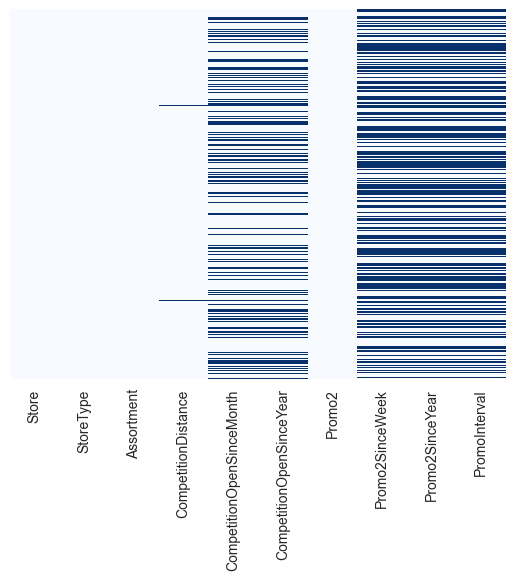

In [73]:
# Let's see if we have any missing data in the store information dataframe!
sns.heatmap(store_info_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

In [74]:
# Let's take a look at the missing values in the 'CompetitionDistance'
# Only 3 rows are missing
store_info_df[store_info_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [75]:
# Let's take a look at the missing values in the 'CompetitionOpenSinceMonth'
# many rows are missing = 354 (almost one third of the 1115 stores)
store_info_df[store_info_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [76]:
store_info_df[store_info_df['Promo2'] == 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [77]:
# It seems like if 'promo2' is zero, 'promo2SinceWeek', 'Promo2SinceYear', and 'PromoInterval' information is set to zero
# There are 354 rows where 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth' is missing
# Let's set these values to zeros
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceYear',
            'CompetitionOpenSinceMonth']

for str in str_cols:
    store_info_df[str].fillna(0, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_33016\2235238312.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_info_df [str].fillna(0, inplace = True)


<Axes: >

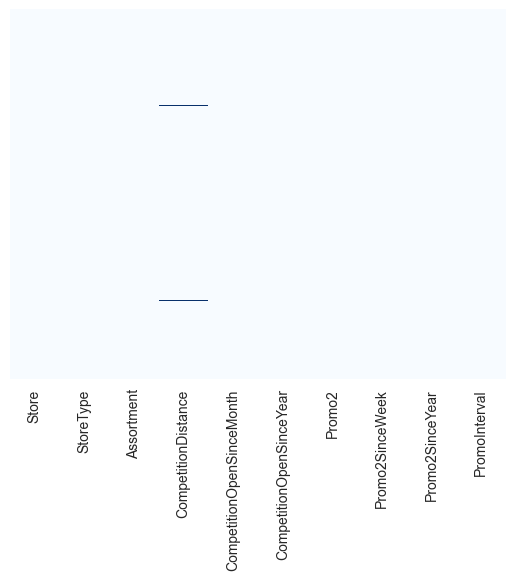

In [78]:
 sns.heatmap(store_info_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

In [79]:
# There are 3 rows with 'competitionDistance' values missing, let's fill them up with average values of the 'CompetitionDistance' column
store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_33016\1111874494.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(), inplace = True)


<Axes: >

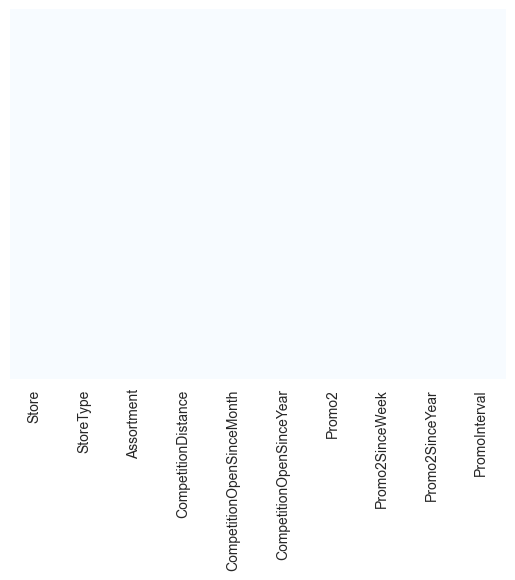

In [80]:
 sns.heatmap(store_info_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'CompetitionDistance'}>,
        <Axes: title={'center': 'CompetitionOpenSinceMonth'}>],
       [<Axes: title={'center': 'CompetitionOpenSinceYear'}>,
        <Axes: title={'center': 'Promo2'}>,
        <Axes: title={'center': 'Promo2SinceWeek'}>],
       [<Axes: title={'center': 'Promo2SinceYear'}>, <Axes: >, <Axes: >]],
      dtype=object)

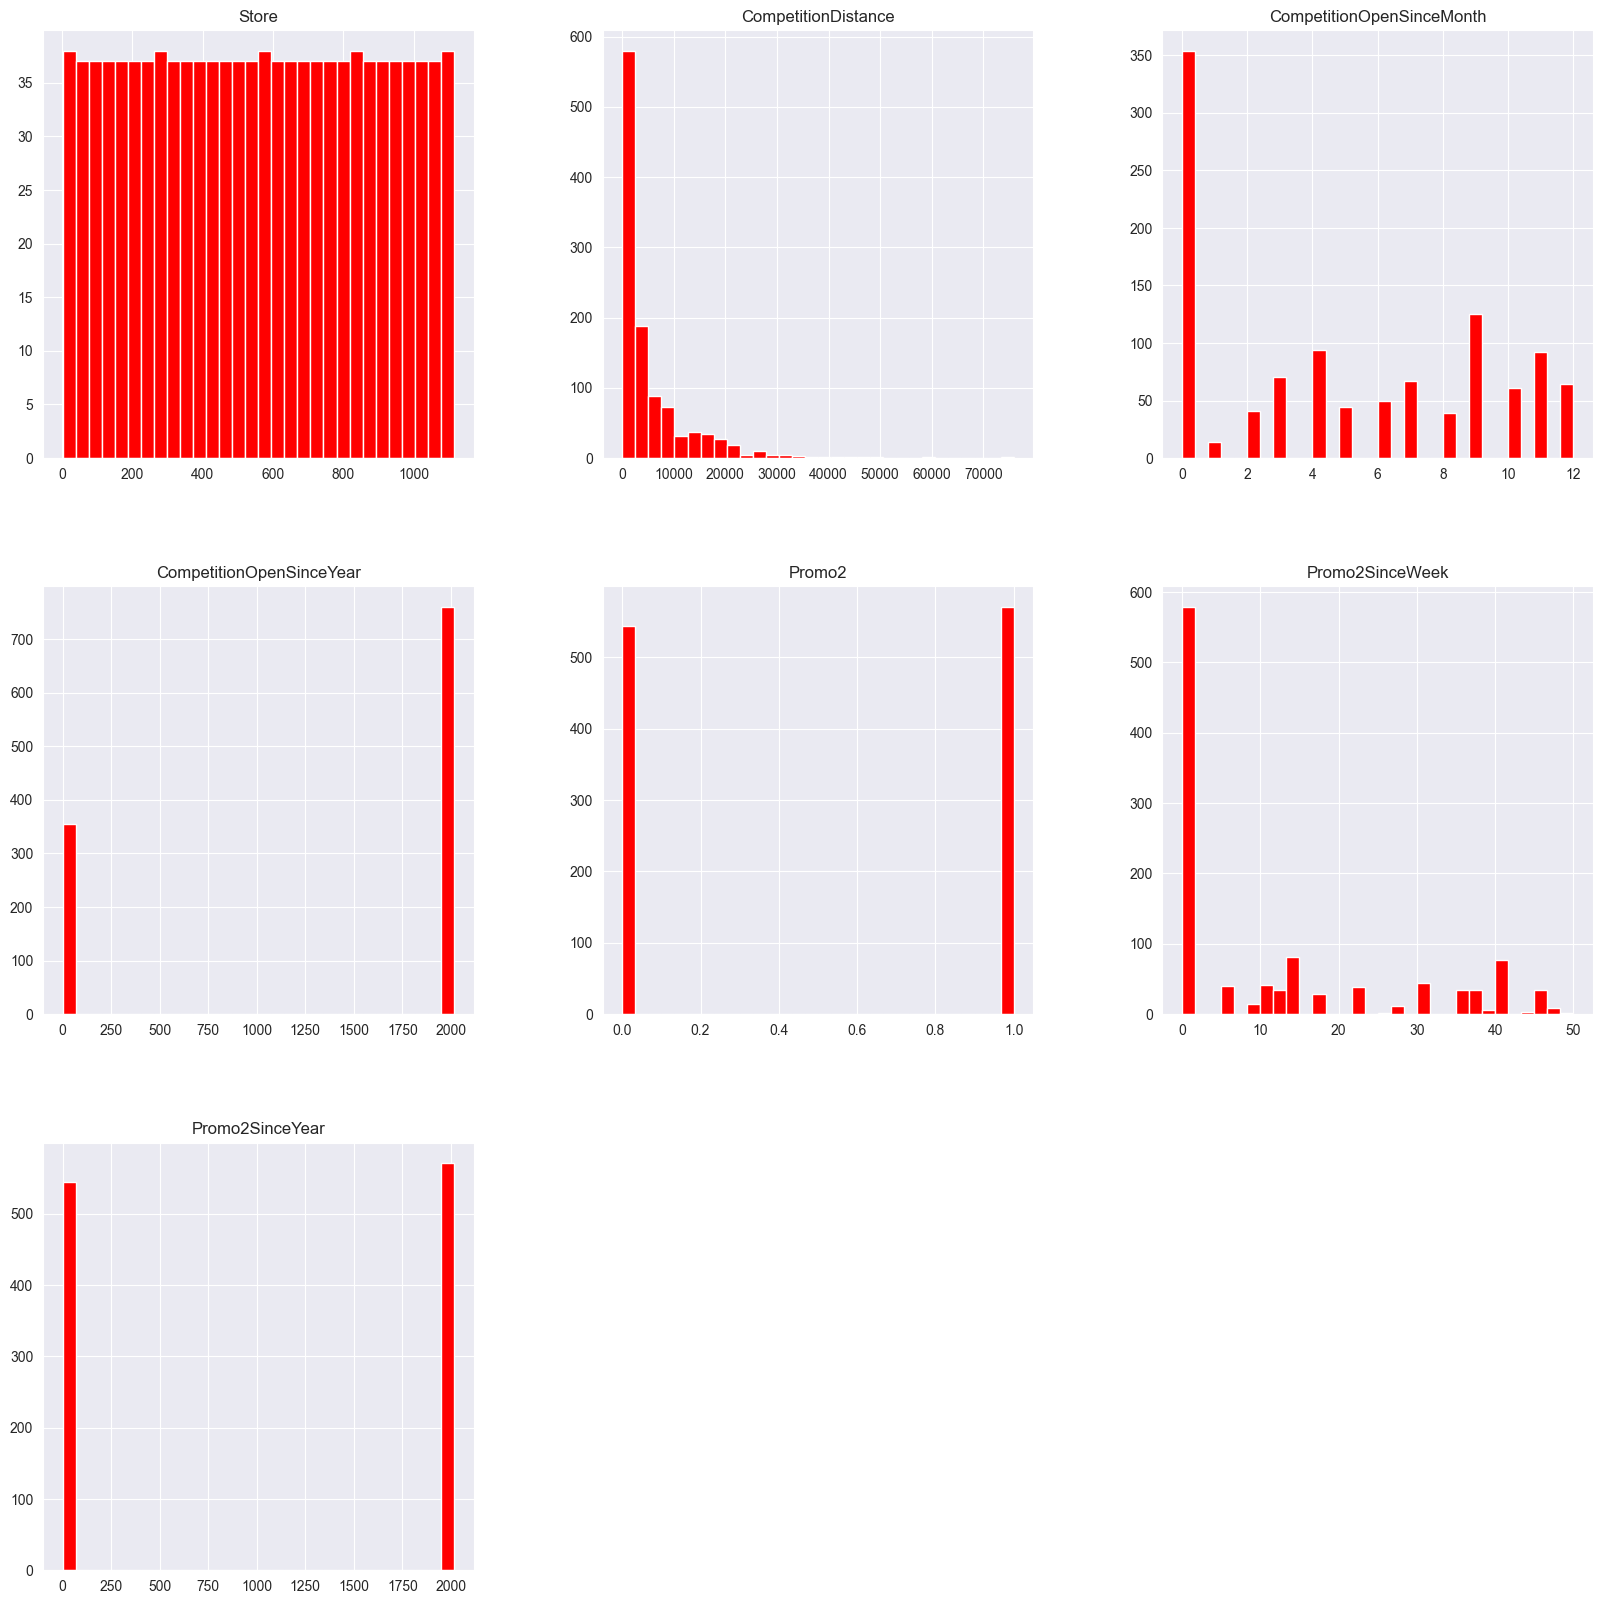

In [81]:
store_info_df.hist(bins=30, figsize=(20, 20), color='r')
# Promo2 chart: half of stores are involved in promo 2
# CompetitionDistance chart: half of the stores have their competition at a distance of 0-3000m (3 kms away)

In [82]:
# Let's merge both data frames together based on 'store'
sales_train_all_df = pd.merge(sales_train_df, store_info_df, how='inner', on='Store')
print("In total: ", sales_train_all_df.shape)
sales_train_all_df.head()


In total:  (844338, 18)


,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,0,1,9.702400,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,0,1,10.126675,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,0,1,9.342457,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,0,1,8.626118,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


Store types<br>
In this section we will closely look at different levels of StoreType and how the main metric Sales is distributed among them.

In [83]:
sales_train_all_df.groupby('StoreType')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,457042.0,6925.697986,3277.351589,46.0,4695.25,6285.0,8406.00,41551.0
b,15560.0,10233.380141,5155.729868,1252.0,6345.75,9130.0,13184.25,38722.0
c,112968.0,6933.126425,2896.958579,133.0,4916.00,6408.0,8349.25,31448.0
d,258768.0,6822.300064,2556.401455,538.0,5050.00,6395.0,8123.25,38037.0


StoreType B has the highest average of Sales among all others, however we have much less data for it. So let's print an overall sum of Sales and Customers to see which StoreType is the most selling and crowded one:

In [84]:
sales_train_all_df.groupby('StoreType')[['Customers', 'Sales']].sum()

,Customers,Sales
StoreType,,
a,363541431,3165334859
b,31465616,159231395
c,92129705,783221426
d,156904995,1765392943


Clearly stores of type A is the most selling and crowded one. StoreType D goes on the second place in both Sales and Customers. What about date periods? Seaborn's facet grid is the best tool for this task:

In [89]:
# Let's separate the year, month, day & week and put them into a separate columns
sales_train_all_df['Date'] = pd.to_datetime(sales_train_all_df['Date'])
sales_train_all_df['Year'] = sales_train_all_df['Date'].dt.year
sales_train_all_df['Month'] = sales_train_all_df['Date'].dt.month
sales_train_all_df['Day'] = sales_train_all_df['Date'].dt.day
sales_train_all_df['WeekOfYear'] = sales_train_all_df['Date'].dt.isocalendar().week
sales_train_all_df.tail()


,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,SalePerCustomer,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,Day
844333,682,2,2013-01-01,3375,566,0,a,1,5.962898,b,...,9.0,2006.0,0,0.0,0.0,0,2013,1,1,1
844334,733,2,2013-01-01,10765,2377,0,a,1,4.528818,b,...,10.0,1999.0,0,0.0,0.0,0,2013,1,1,1
844335,769,2,2013-01-01,5035,1248,0,a,1,4.034455,b,...,0.0,0.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1
844336,948,2,2013-01-01,4491,1039,0,a,1,4.322425,b,...,0.0,0.0,0,0.0,0.0,0,2013,1,1,1
844337,1097,2,2013-01-01,5961,1405,0,a,1,4.242705,b,...,3.0,2002.0,0,0.0,0.0,0,2013,1,1,1


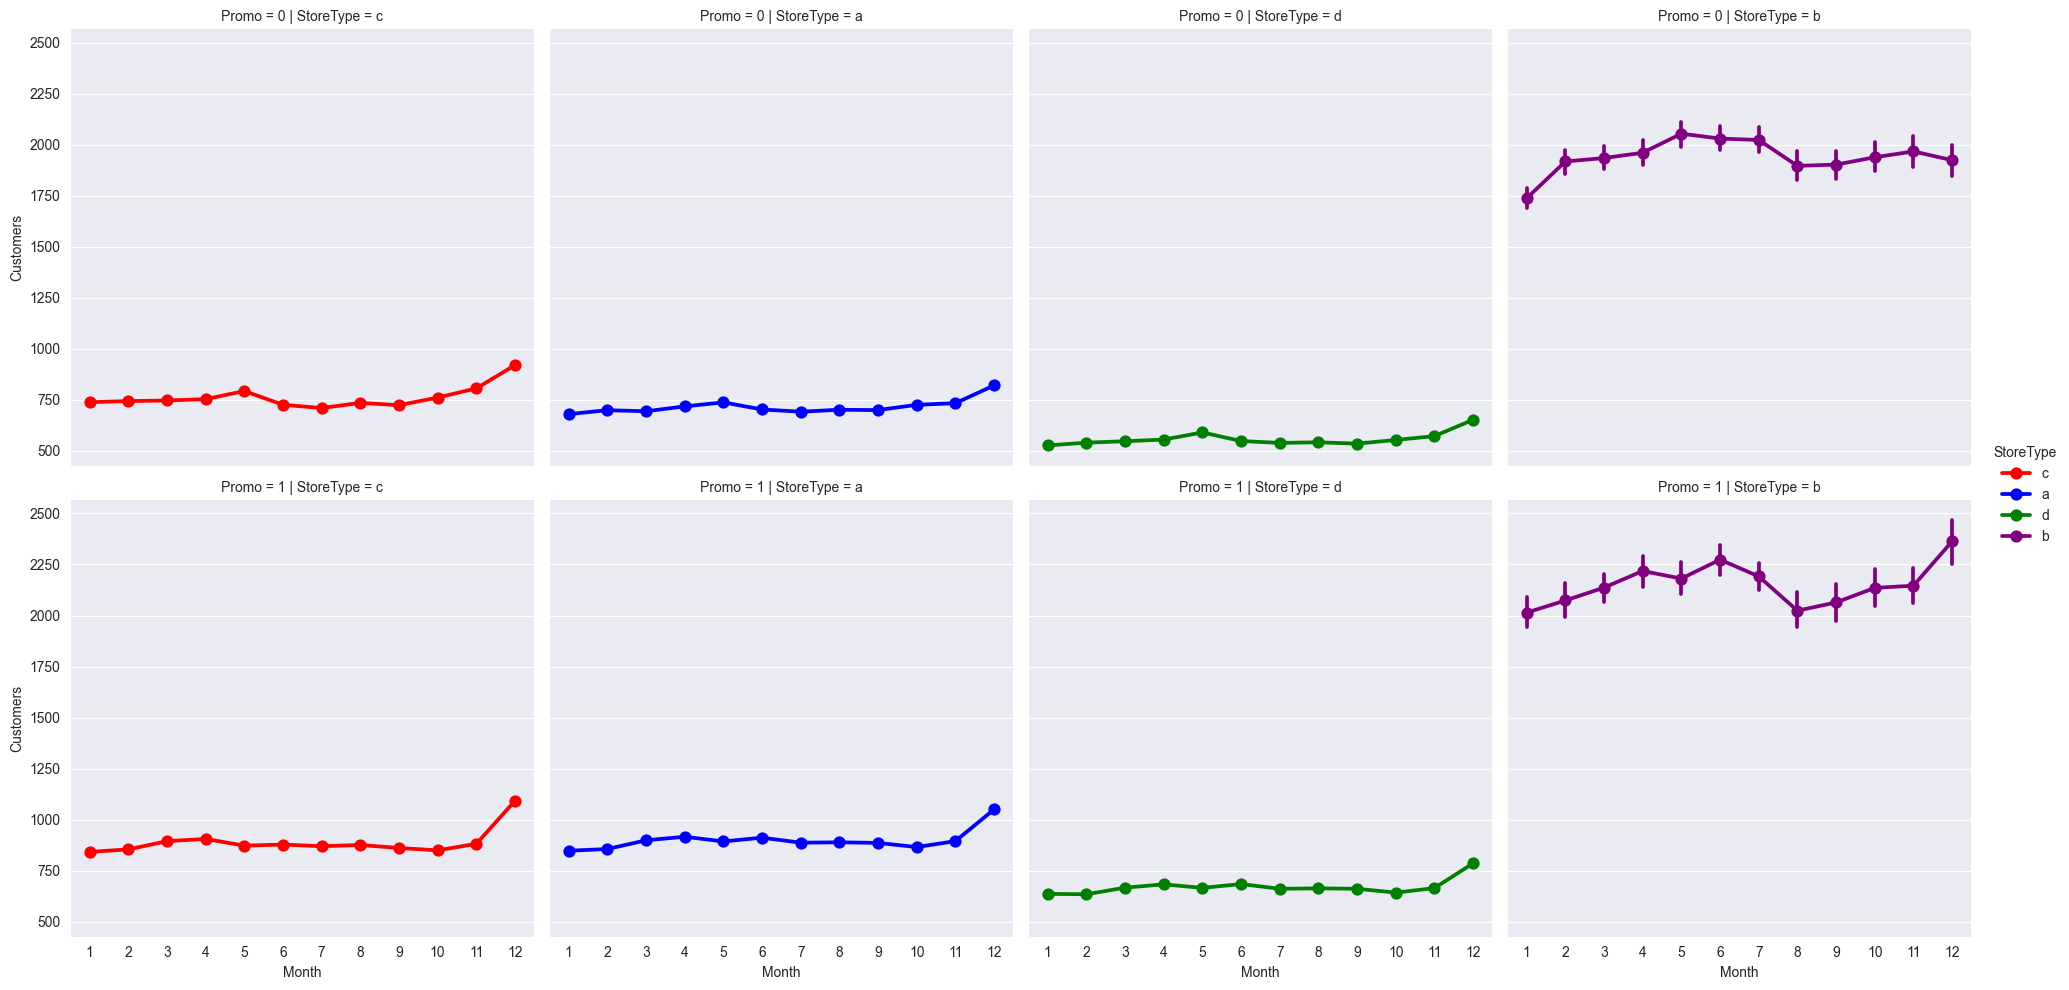

In [94]:
# sales trends
sns.catplot(data=sales_train_all_df, x='Month', y="Customers",
            col='StoreType', # per store type in cols
            palette=["red", "blue", "green", "purple"],
            hue='StoreType',
            row='Promo', # per promo in the store in rows
            kind="point")

All store types follow the same trend but at different scales depending on the presence of the (first) promotion Promo and StoreType itself (case for B).<br>

**Already at this point, we can see that Sales escalate towards Christmas holidays. But we'll talk about seasonalities and trends later in the Time Series Analysis section.**

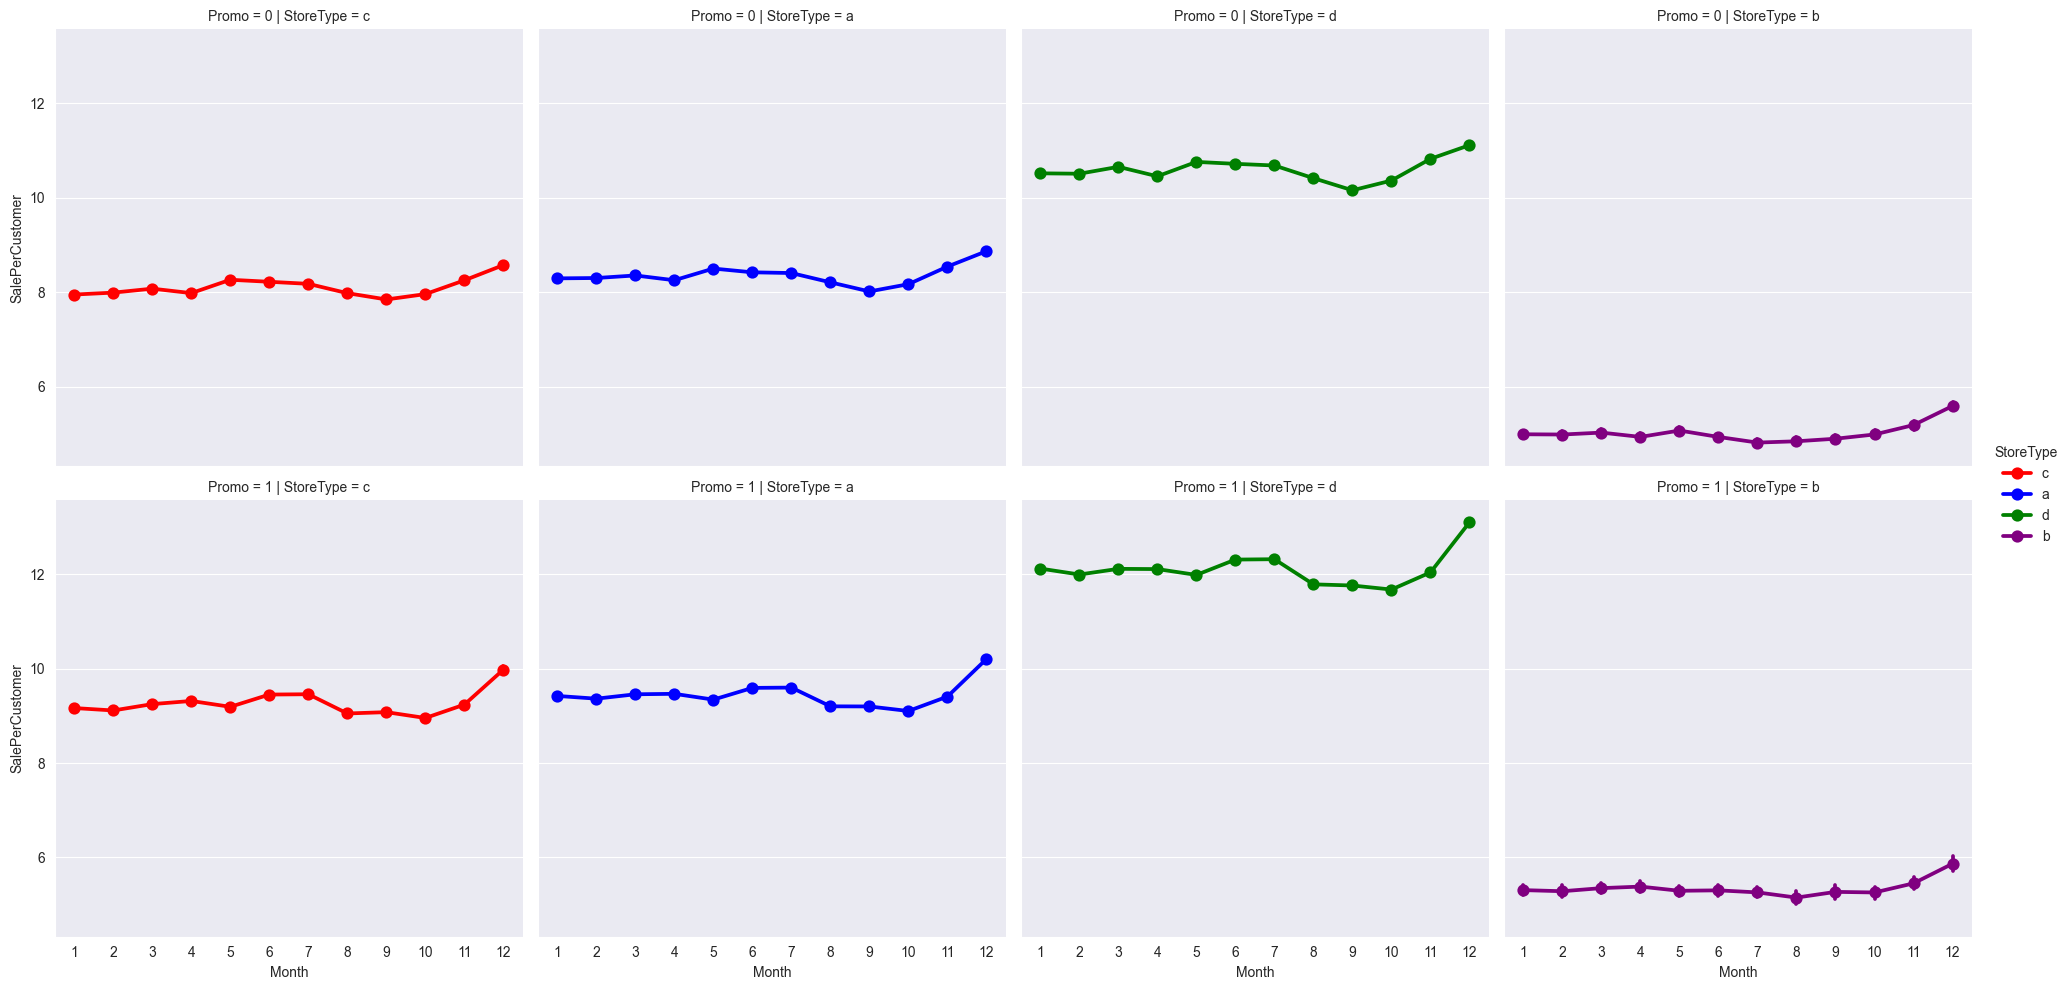

In [95]:
# sale per customer trends
sns.catplot(data=sales_train_all_df, x='Month', y="SalePerCustomer",
            col='StoreType', # per store type in cols
            palette=["red", "blue", "green", "purple"],
            hue='StoreType',
            row='Promo', # per promo in the store in rows
            kind="point")

Aha! Eventhough the plots above showed StoreType B as the most selling and performant one, in reality it is not true. The highest SalePerCustomer amount is observed at the StoreType D, about 12€ with Promo and 10€ without. As for StoreType A and C it is about 9€.<br>

Low SalePerCustomer amount for StoreType B describes its Buyer Cart: there are a lot of people who shop essentially for "small" things (or in a little quantity). Plus we saw that overall this StoreType generated the least amount of sales and customers over the period.

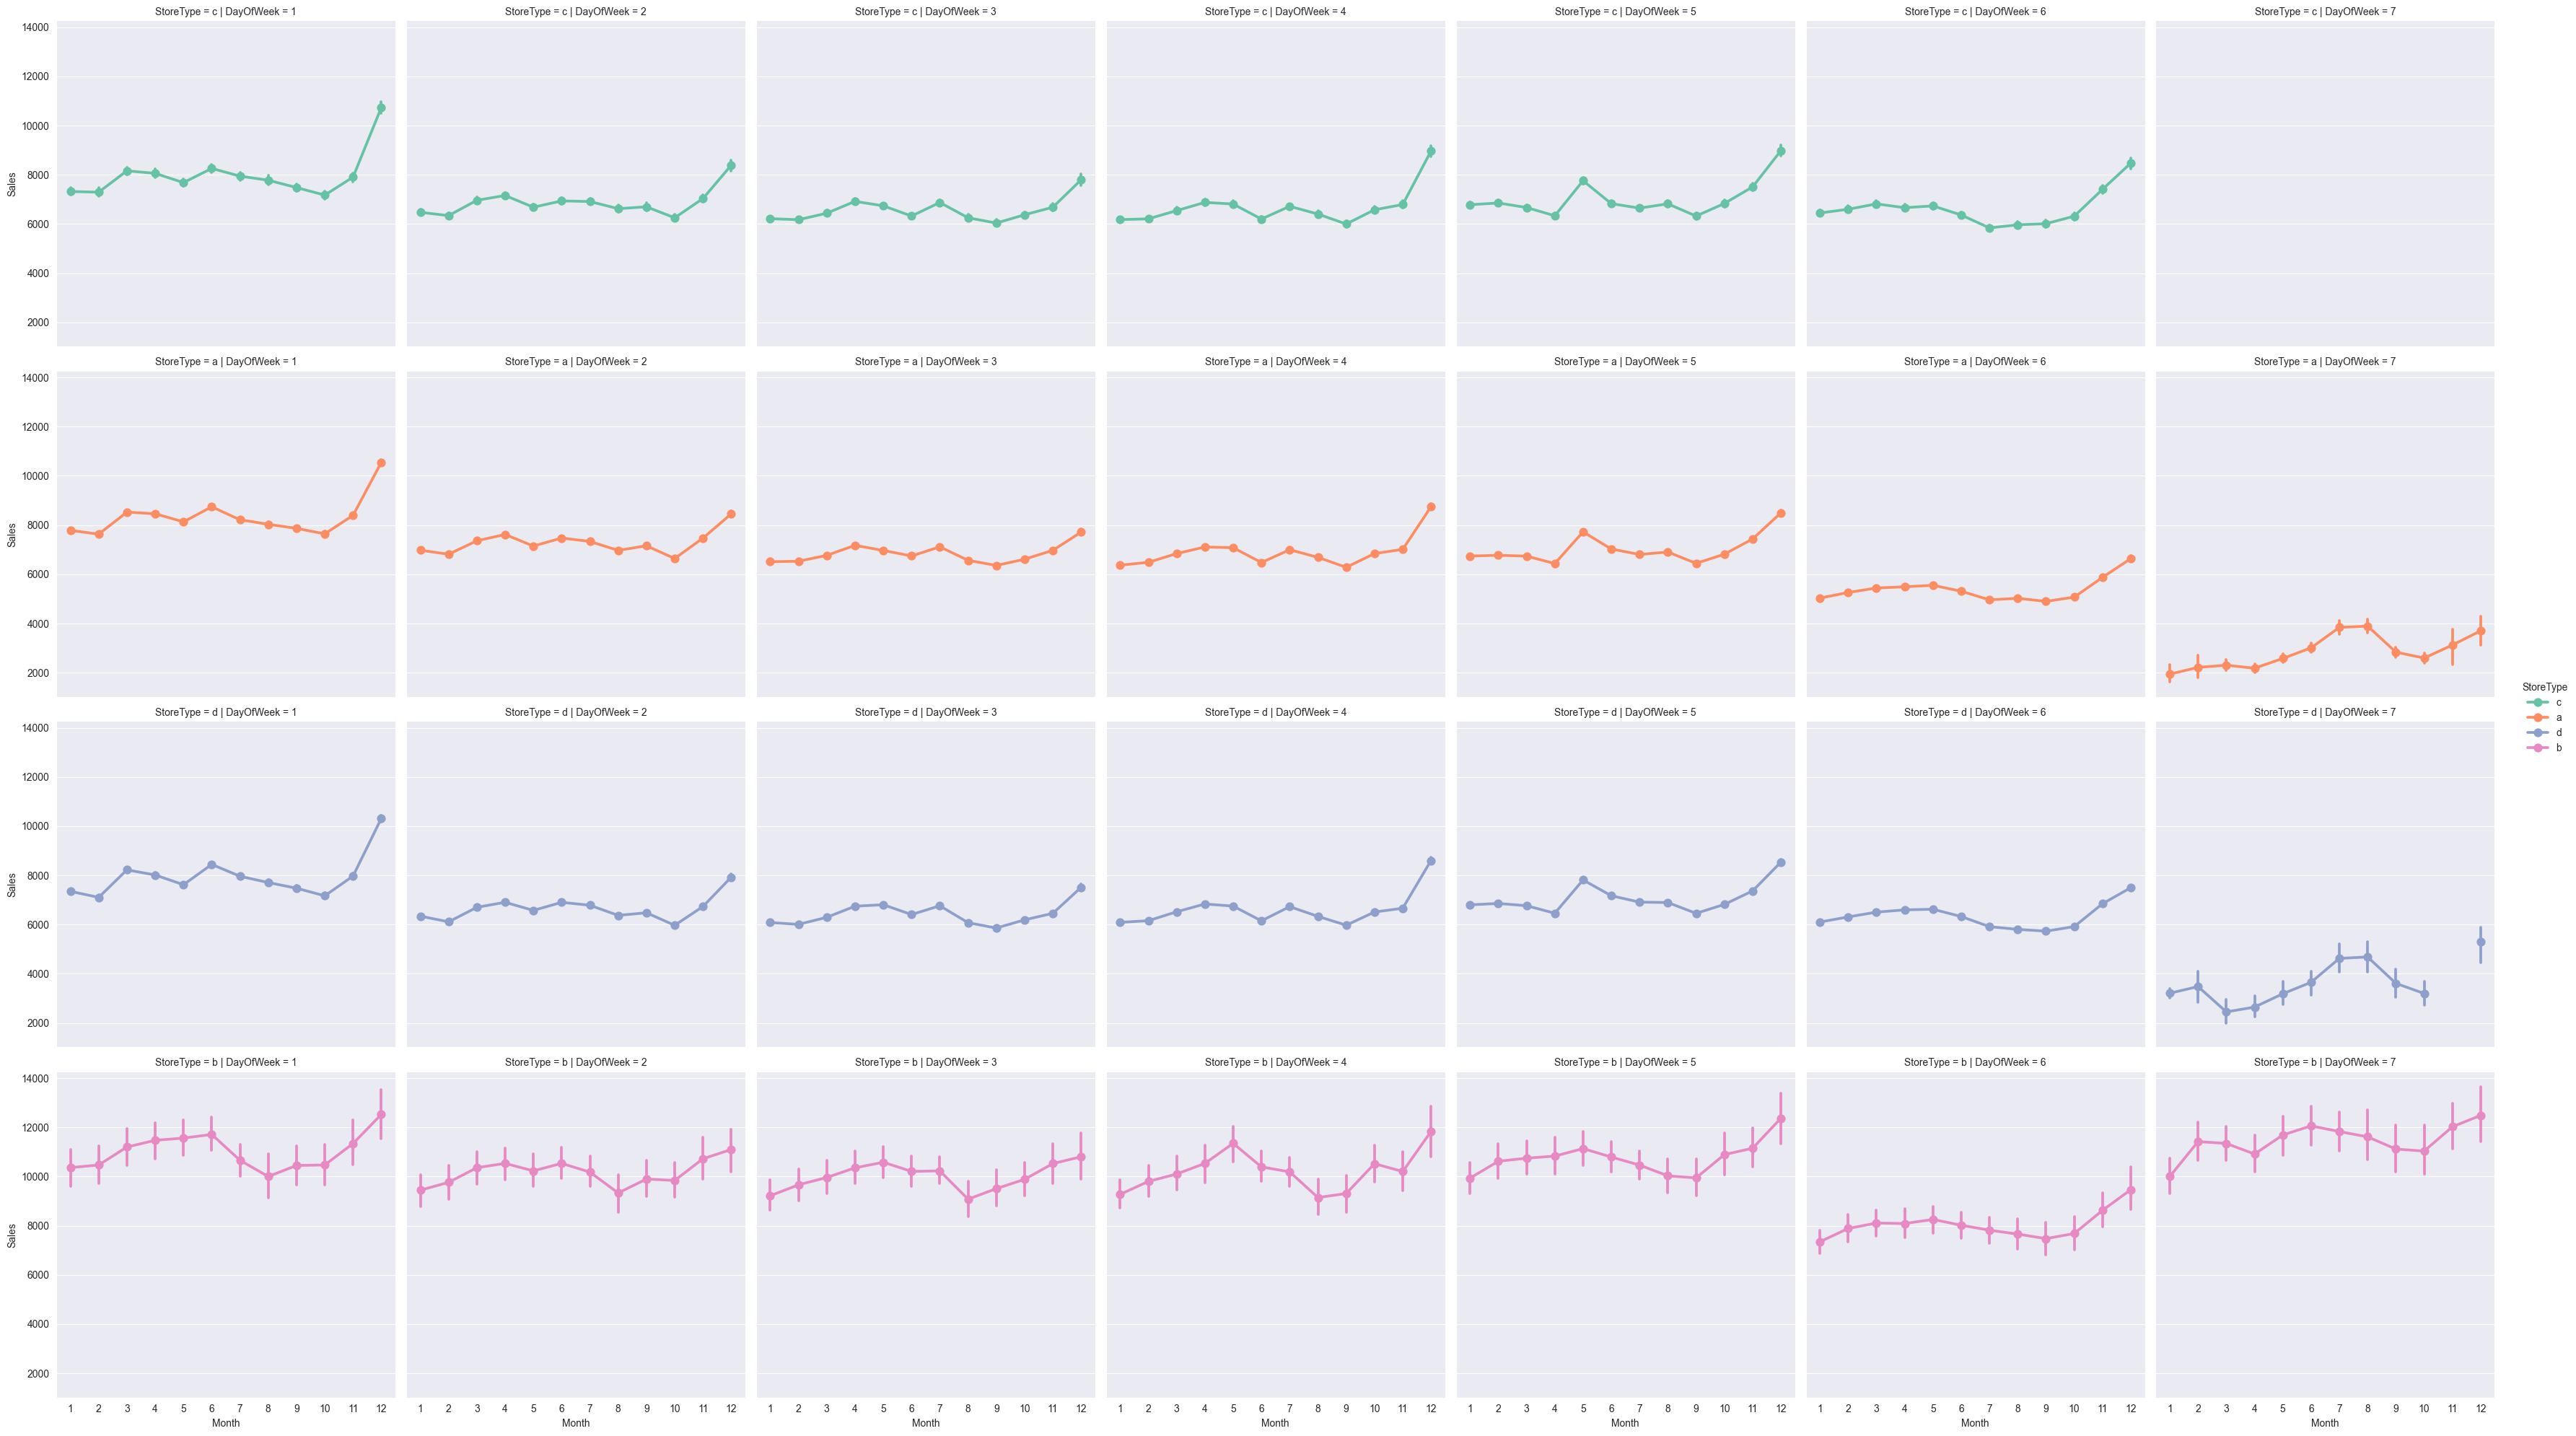

In [96]:
# customers
sns.catplot(data=sales_train_all_df, x='Month', y="Sales",
            col='DayOfWeek', # per day of week in cols
            palette="Set2",
            hue='StoreType',
            row='StoreType', # per store type in rows
            kind="point")

We see that stores of StoreType C are all closed on Sundays, whereas others are most of the time opened. Interestingly enough, stores of StoreType D are closed on Sundays only in November.<br>

Bt the way what are the stores which are opened on Sundays?

In [98]:
sales_train_all_df[sales_train_all_df.DayOfWeek == 7]['Store'].unique()

array([  85,  122,  209,  259,  262,  274,  299,  310,  335,  353,  423,
        433,  453,  494,  512,  524,  530,  562,  578,  676,  682,  732,
        733,  769,  863,  867,  931,  948, 1045, 1081, 1097, 1099,  877])